In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchtyping import TensorType

x = torch.tensor([10, 100, 1000])
y = torch.tensor([1.94, 7.44, 12.92])

def michaelis(x:TensorType, batch_size:int):
    if len(x) > batch_size:
        batch_number = 0
        for batch in x[batch_number*batch_size, (batch_number+1)*batch_size]:
            v = np.random.randn()
            k = np.random.randn()
        pass
    else:
        v = torch.randn(1, requires_grad=True)
        k = torch.randn(1, requires_grad=True)
        #output = [(v*xi)/(k+xi) for xi in x]
        output = (v*x)/(k+x)

    return output

o = michaelis(x, 10)

In [2]:
x = torch.tensor([10, 100, 1000])
y = torch.tensor([1.94, 7.44, 12.92])

class MichaelisMenten():
    def __init__(self):
        self.v = torch.randn(1, requires_grad=True)
        self.k = torch.randn(1, requires_grad=True)
    @property
    def params(self):
        return [self.v, self.k]

    def forward(self,x):
        return (self.v*x)/(self.k+x)
    
m = MichaelisMenten()
m.params

[tensor([0.0053], requires_grad=True), tensor([0.7623], requires_grad=True)]

In [3]:
def square_loss(y_pred:TensorType, y:TensorType):
    return ((y_pred-y)**2)*0.5

def sgd(params, lr, batch_size = 1):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()


Text(0.5, 1.0, 'k:tensor([75.7434]), v: tensor([13.7075])')

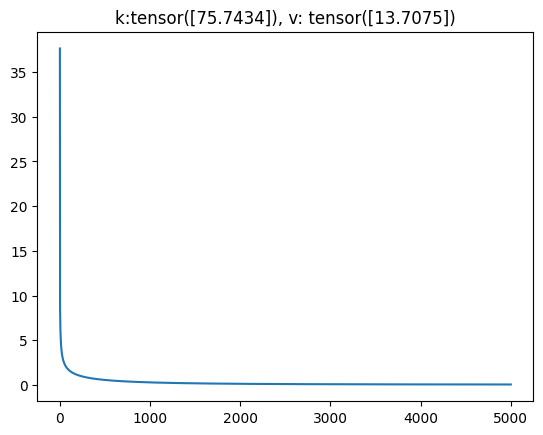

In [4]:
lr = 0.3
num_epochs = 5000

all_loss = []
for epoch in range(num_epochs):
    pred = m.forward(x)
    ls = square_loss(pred, y)
    ls.sum().backward()
    sgd([m.v, m.k], lr, 1)
    all_loss.append(float(ls.mean()))
    #print(f'epoch {epoch + 1}, loss {float(ls.mean()):f}, k:{m.k.detach()}, v: {m.v.detach()}')
#with torch.no_grad():
    #train_loss = square_loss(m.forward(x), y)
    #print(f'epoch {epoch + 1}, loss {float(train_loss.mean()):f}')
plt.plot(np.arange(num_epochs), all_loss)
plt.title(f'k:{m.k.detach()}, v: {m.v.detach()}')

C:\Users\hp\AppData\Local\Temp\ipykernel_14592\4251348287.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(a, (m.v.detach()*a)/(m.k.detach()+a))


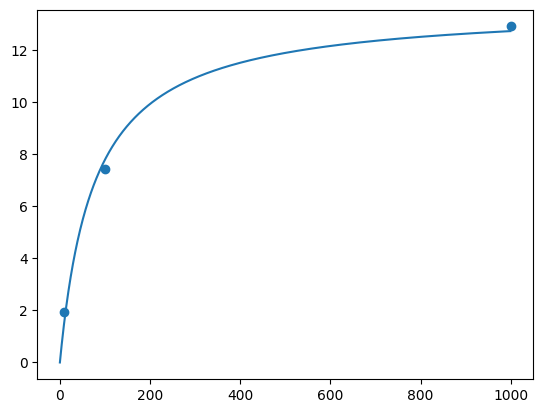

In [5]:
a = np.arange(1000)
plt.plot(a, (m.v.detach()*a)/(m.k.detach()+a))
plt.scatter(x, y)

x = np.array([10, 100, 1000])
y = np.array([1.94, 7.44, 12.92])

def michaelis(x:np.array[[float|int]], batch_size:int):
    if len(x) > batch_size:
        batch_number = 0
        for batch in x[batch_number*batch_size, (batch_number+1)*batch_size]:
            v = np.random.randn()
            k = np.random.randn()
        pass
    else:
        v = np.random.randn()
        k = np.random.randn()
        #output = [(v*xi)/(k+xi) for xi in x]
        output = (v*x)/(k+x)

    return output

o = michaelis(x, 10)